# Import Libraries 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

# Load Data

In [80]:
df_train = pd.read_csv('Data/Merged_Train.csv')
df_test = pd.read_csv('Data/Merged_Test.csv')

In [81]:
df_train.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Weekly_Sales'],
      dtype='object')

In [82]:
x_train = df_train.drop(columns=['Weekly_Sales'], axis=1)
y_train = df_train['Weekly_Sales']
x_test = df_test


In [83]:
x_train.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


# Train-val split

In [84]:
# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split( x_train, y_train, test_size=0.2, random_state=42)

# Handling Outliers

In [85]:
num_cols = x_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = x_train.select_dtypes(include=["object", "category"]).columns.tolist()

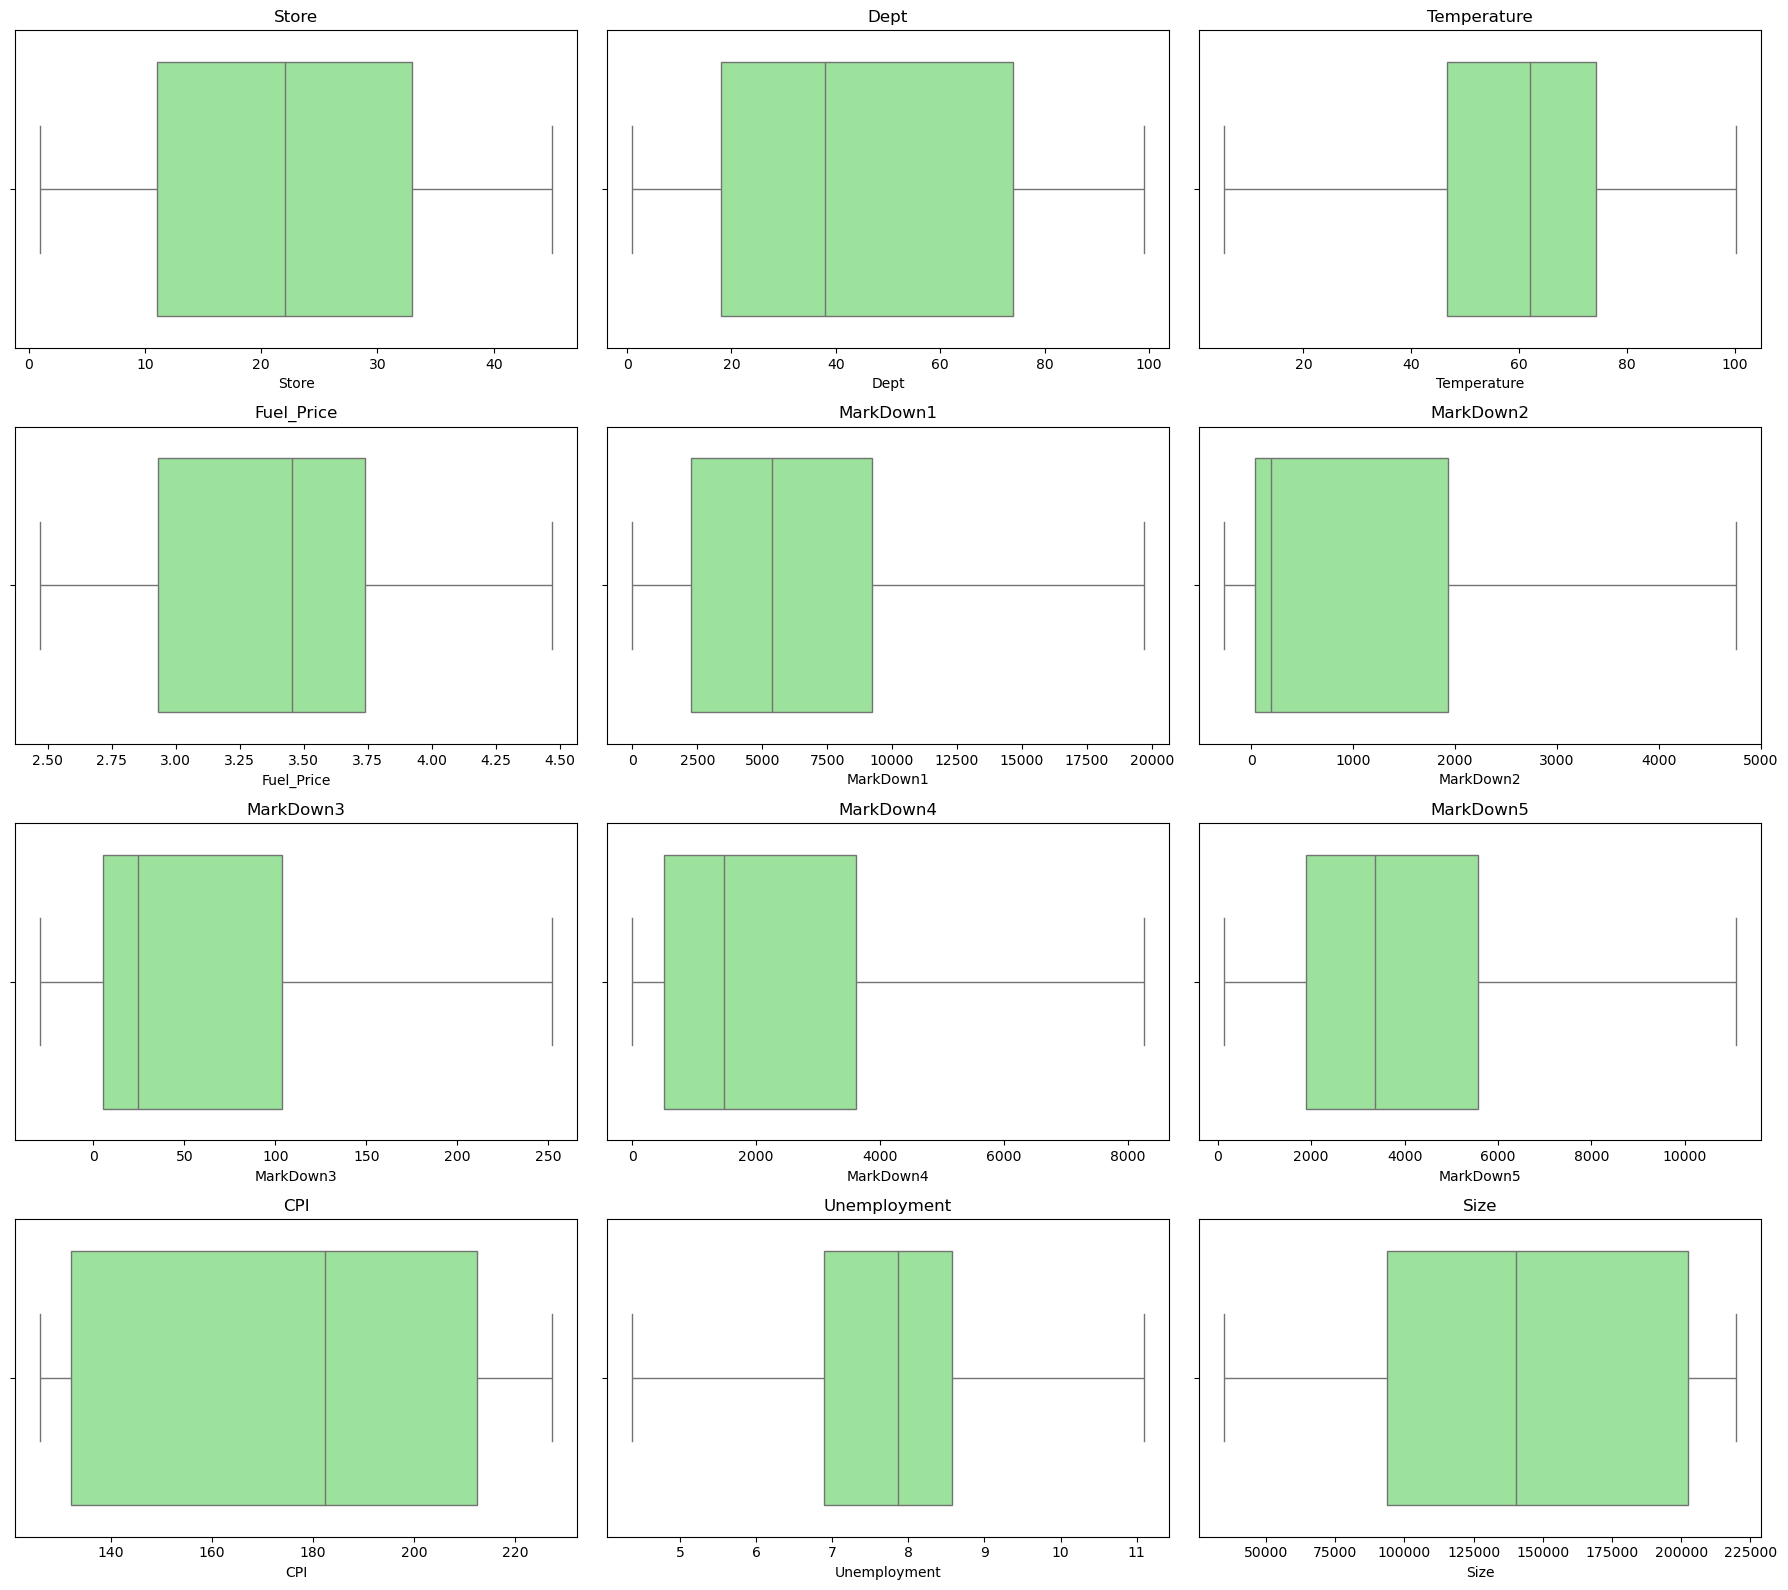

In [86]:
for col in num_cols:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    x_train[col] = np.where(x_train[col] < lower_bound, lower_bound,np.where(x_train[col] > upper_bound, upper_bound, x_train[col]))
    x_val[col] = np.where(x_val[col] < lower_bound, lower_bound,np.where(x_val[col] > upper_bound, upper_bound, x_val[col]))
    x_test[col] = np.where(x_test[col] < lower_bound, lower_bound,np.where(x_test[col] > upper_bound, upper_bound, x_test[col]))

# After handling outliers plot
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=x_train[col], color='lightgreen')
    plt.title(f'{col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Fill Missing Values

In [87]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    mean_val = x_train[col].mean()
    x_train[col] = x_train[col].fillna(mean_val)
    x_val[col] = x_val[col].fillna(mean_val)
    x_test[col] = x_test[col].fillna(mean_val)

In [88]:
x_train.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

# Fixing Data types

In [89]:
x_train['Date'] = pd.to_datetime(x_train['Date'])
x_val['Date'] = pd.to_datetime(x_val['Date'])
x_test['Date'] = pd.to_datetime(x_test['Date'])

In [90]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337256 entries, 138466 to 121958
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         337256 non-null  float64       
 1   Dept          337256 non-null  float64       
 2   Date          337256 non-null  datetime64[ns]
 3   IsHoliday     337256 non-null  bool          
 4   Temperature   337256 non-null  float64       
 5   Fuel_Price    337256 non-null  float64       
 6   MarkDown1     337256 non-null  float64       
 7   MarkDown2     337256 non-null  float64       
 8   MarkDown3     337256 non-null  float64       
 9   MarkDown4     337256 non-null  float64       
 10  MarkDown5     337256 non-null  float64       
 11  CPI           337256 non-null  float64       
 12  Unemployment  337256 non-null  float64       
 13  Type          337256 non-null  object        
 14  Size          337256 non-null  float64       
dtypes: bool(1), datet

# Encode Categorical & Boolean Data

In [91]:
encoded_cols = ['Type', 'IsHoliday']
le = LabelEncoder()
for col in encoded_cols:
    x_train[col] = le.fit_transform(x_train[col])
    x_val[col] = le.transform(x_val[col])
    x_test[col] = le.transform(x_test[col])

In [92]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337256 entries, 138466 to 121958
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         337256 non-null  float64       
 1   Dept          337256 non-null  float64       
 2   Date          337256 non-null  datetime64[ns]
 3   IsHoliday     337256 non-null  int64         
 4   Temperature   337256 non-null  float64       
 5   Fuel_Price    337256 non-null  float64       
 6   MarkDown1     337256 non-null  float64       
 7   MarkDown2     337256 non-null  float64       
 8   MarkDown3     337256 non-null  float64       
 9   MarkDown4     337256 non-null  float64       
 10  MarkDown5     337256 non-null  float64       
 11  CPI           337256 non-null  float64       
 12  Unemployment  337256 non-null  float64       
 13  Type          337256 non-null  int32         
 14  Size          337256 non-null  float64       
dtypes: datetime64[ns]

# Feature Engineering

In [93]:
# Date Based Features
x_train['Year'] = x_train['Date'].dt.year
x_train['Month'] = x_train['Date'].dt.month
x_train['Week'] = x_train['Date'].dt.isocalendar().week
x_train['Day'] = x_train['Date'].dt.day
x_train['DayOfWeek'] = x_train['Date'].dt.dayofweek
x_train['Quarter'] = x_train['Date'].dt.quarter

x_val['Year'] = x_val['Date'].dt.year
x_val['Month'] = x_val['Date'].dt.month
x_val['Week'] = x_val['Date'].dt.isocalendar().week
x_val['Day'] = x_val['Date'].dt.day
x_val['DayOfWeek'] = x_val['Date'].dt.dayofweek
x_val['Quarter'] = x_val['Date'].dt.quarter

x_test['Year'] = x_test['Date'].dt.year
x_test['Month'] = x_test['Date'].dt.month
x_test['Week'] = x_test['Date'].dt.isocalendar().week
x_test['Day'] = x_test['Date'].dt.day
x_test['DayOfWeek'] = x_test['Date'].dt.dayofweek
x_test['Quarter'] = x_test['Date'].dt.quarter

In [94]:
#  Holiday proximity features
x_train['DaysToHoliday'] = x_train.groupby(['Store', 'Dept'])['IsHoliday'].transform(lambda x: x[::-1].cumsum()[::-1])
x_val['DaysToHoliday'] = x_val.groupby(['Store', 'Dept'])['IsHoliday'].transform(lambda x: x[::-1].cumsum()[::-1])
x_test['DaysToHoliday'] = x_test.groupby(['Store', 'Dept'])['IsHoliday'].transform(lambda x: x[::-1].cumsum()[::-1])


# MarkDown total
x_train['MarkDown_Total'] = x_train[markdown_cols].sum(axis=1)
x_val['MarkDown_Total'] = x_val[markdown_cols].sum(axis=1)
x_test['MarkDown_Total'] = x_test[markdown_cols].sum(axis=1)

x_train = x_train.drop(columns=markdown_cols, axis=1)
x_val = x_val.drop(columns=markdown_cols, axis=1)
x_test = x_test.drop(columns=markdown_cols, axis=1)

In [95]:
# Historical Averages 
historical_means = x_train.groupby(['Store', 'Dept']).agg({'Temperature': 'mean','Fuel_Price': 'mean', 'MarkDown_Total': 'mean','CPI': 'mean','Unemployment': 'mean'}).add_prefix('Historical_Avg_')

x_train = x_train.merge(historical_means, on=['Store', 'Dept'], how='left')
x_val = x_val.merge(historical_means, on=['Store', 'Dept'], how='left')
x_test = x_test.merge(historical_means, on=['Store', 'Dept'], how='left')

# To prevent nulls
global_avgs = x_train.filter(like='Historical_Avg_').mean()  
x_val = x_val.fillna(global_avgs)
x_test = x_test.fillna(global_avgs)

In [96]:
# Calculate changes
x_train['FuelPrice_Change'] = x_train.groupby(['Store', 'Dept'])['Fuel_Price'].diff()
x_val['FuelPrice_Change'] = x_val.groupby(['Store', 'Dept'])['Fuel_Price'].diff()
x_test['FuelPrice_Change'] = x_test.groupby(['Store', 'Dept'])['Fuel_Price'].diff()

x_train['Temperature_Change'] = x_train.groupby(['Store', 'Dept'])['Temperature'].diff()
x_val['Temperature_Change'] = x_val.groupby(['Store', 'Dept'])['Temperature'].diff()
x_test['Temperature_Change'] = x_test.groupby(['Store', 'Dept'])['Temperature'].diff()

# Fill nulls - first try group mean, then overall mean as fallback
for df in [x_train,x_val, x_test]:
    for col in ['FuelPrice_Change', 'Temperature_Change']:
        group_means = df.groupby(['Store', 'Dept'])[col].transform('mean')
        overall_mean = df[col].mean()
        df[col] = df[col].fillna(group_means).fillna(overall_mean).fillna(0)

In [97]:
# Create "pseudo-lag" features using available data
x_train['Prev_IsHoliday'] = x_train.groupby(['Store', 'Dept'])['IsHoliday'].shift(1)
x_train['Prev_Temperature'] = x_train.groupby(['Store', 'Dept'])['Temperature'].shift(1)
x_train['Prev_MarkDown'] = x_train.groupby(['Store', 'Dept'])['MarkDown_Total'].shift(1)

# Fill nulls with appropriate values
for col in ['Prev_IsHoliday', 'Prev_Temperature', 'Prev_MarkDown']:
    x_train[col] = x_train[col].fillna(x_train[col].mean())
    
x_val['Prev_IsHoliday'] = x_val.groupby(['Store', 'Dept'])['IsHoliday'].shift(1)
x_val['Prev_Temperature'] = x_val.groupby(['Store', 'Dept'])['Temperature'].shift(1)
x_val['Prev_MarkDown'] = x_val.groupby(['Store', 'Dept'])['MarkDown_Total'].shift(1)

# Fill nulls with appropriate values
for col in ['Prev_IsHoliday', 'Prev_Temperature', 'Prev_MarkDown']:
    x_val[col] = x_val[col].fillna(x_val[col].mean())
    
x_test['Prev_IsHoliday'] = x_test.groupby(['Store', 'Dept'])['IsHoliday'].shift(1)
x_test['Prev_Temperature'] = x_test.groupby(['Store', 'Dept'])['Temperature'].shift(1)
x_test['Prev_MarkDown'] = x_test.groupby(['Store', 'Dept'])['MarkDown_Total'].shift(1)

# Fill nulls with appropriate values
for col in ['Prev_IsHoliday', 'Prev_Temperature', 'Prev_MarkDown']:
    x_test[col] = x_test[col].fillna(x_test[col].mean())

In [98]:
# Rolling averages of measurable features
for window in [4, 8, 12, 26, 52]:  
    x_train[f'Temperature_Rolling{window}'] = x_train.groupby(['Store', 'Dept'])['Temperature'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    
    x_train[f'FuelPrice_Rolling{window}'] = x_train.groupby(['Store', 'Dept'])['Fuel_Price'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    
    x_train[f'MarkDown_Rolling{window}'] = x_train.groupby(['Store', 'Dept'])['MarkDown_Total'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    
    x_val[f'Temperature_Rolling{window}'] = x_val.groupby(['Store', 'Dept'])['Temperature'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    
    x_val[f'FuelPrice_Rolling{window}'] = x_val.groupby(['Store', 'Dept'])['Fuel_Price'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    
    x_val[f'MarkDown_Rolling{window}'] = x_val.groupby(['Store', 'Dept'])['MarkDown_Total'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    
    x_test[f'Temperature_Rolling{window}'] = x_test.groupby(['Store', 'Dept'])['Temperature'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    
    x_test[f'FuelPrice_Rolling{window}'] = x_test.groupby(['Store', 'Dept'])['Fuel_Price'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    
    x_test[f'MarkDown_Rolling{window}'] = x_test.groupby(['Store', 'Dept'])['MarkDown_Total'].transform(lambda x: x.rolling(window, min_periods=1).mean())


In [99]:
x_train.drop(columns=['Date'], inplace=True)
x_val.drop(columns=['Date'], inplace=True)
x_test.drop(columns=['Date'], inplace=True)

# Load Preprocessed Data

In [ ]:
# Reset indices to ensure alignment
x_train_reset = x_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)  

x_val_reset = x_val.reset_index(drop=True)
y_val_reset = y_val.reset_index(drop=True)

df_preprocessed_train = pd.concat([x_train_reset, y_train_reset], axis=1)
df_preprocessed_val = pd.concat([x_val_reset, y_val_reset], axis=1)
df_preprocessed_test = x_test.copy()  

df_preprocessed_train.to_csv('PreProcessed Data/Preprocessed_Train.csv', index=False)
df_preprocessed_val.to_csv('PreProcessed Data/Preprocessed_Val.csv', index=False)
df_preprocessed_test.to_csv('PreProcessed Data/Preprocessed_Test.csv', index=False)

In [102]:
df_preprocessed_train.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,...,Temperature_Rolling12,FuelPrice_Rolling12,MarkDown_Rolling12,Temperature_Rolling26,FuelPrice_Rolling26,MarkDown_Rolling26,Temperature_Rolling52,FuelPrice_Rolling52,MarkDown_Rolling52,Weekly_Sales
0,15.0,3.0,0,30.34,3.811,134.068258,7.658,1,123737.0,2011,...,30.34,3.811,14331.880512,30.34,3.811,14331.880512,30.34,3.811,14331.880512,7490.24
1,30.0,25.0,0,83.51,2.668,211.112002,8.200,2,42988.0,2010,...,83.51,2.668,14331.880512,83.51,2.668,14331.880512,83.51,2.668,14331.880512,48.25
2,6.0,27.0,0,79.44,2.705,212.698244,7.092,0,202505.0,2010,...,79.44,2.705,14331.880512,79.44,2.705,14331.880512,79.44,2.705,14331.880512,1262.75
3,21.0,49.0,0,48.72,3.172,218.359032,7.441,1,140167.0,2011,...,48.72,3.172,12633.090000,48.72,3.172,12633.090000,48.72,3.172,12633.090000,8722.34
4,24.0,55.0,0,32.86,3.585,136.698129,8.659,0,203819.0,2012,...,32.86,3.585,17291.170000,32.86,3.585,17291.170000,32.86,3.585,17291.170000,15247.36
